# **COURSE**          : Advanced Data Analytics 

# **COURSE-CODE**      : CSE-4029 

# **SLOT**             : B1

# **TEAM MEMBERS**

**S. Jayanth - 19BCD7098**

**N.V. Seetharam - 19BCD7185**

**S. Lokesh - 19BCD7230**

**G. Srikar - 19BCE7081** 

## **Project Title :** ***Rainfall Prediction***

Climate is a important aspect of human life. So, the Prediction should accurate as much as possible. In this paper we try to deal with the prediction of the rainfall which is also a major aspect of human life and which provide the major resource of human life which is Fresh Water. Fresh water is always a crucial resource of human survival – not only for the drinking purposes but also for farming, washing and many other purposes.

Making a good prediction of climate is always a major task now a day because of the climate change.

Now climate change is the biggest issue all over the world. Peoples are working on to detect the patterns in climate change as it affects the economy in production to infrastructure. So as in rainfall also making prediction of rainfall is a challenging task with a good accuracy rate. Making prediction on rainfall cannot be done by the traditional way, so scientist is using machine learning and deep learning to find out the pattern for rainfall prediction.

A bad rainfall prediction can affect the agriculture mostly framers as their whole crop is depend on the rainfall and agriculture is always an important part of every economy. So, making an accurate prediction of the rainfall somewhat good. There are number of techniques are used of machine learning but accuracy is always a matter of concern in prediction made in rainfall. There are number of causes made by rainfall affecting the world ex. Drought, Flood and intense summer heat etc. And it will also affect water resources around the world. Our major concern is the major downfall to the rainfall on yearly bases as we can see in Fig 1 the graph show there is the major downfall to the yearly rainfall in millimetre.

In [1]:
#importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import plotly.express as px
import datetime
import warnings
warnings.filterwarnings("ignore")

import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks

# Import ML Libaries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

np.random.seed(0)

## Load Dataset

In [2]:
#connecting to drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
#load dataset
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/weatherIND.csv')

In [4]:
print('Size of weather data frame is :',data.shape)

Size of weather data frame is : (145460, 23)


# About the dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
#inspect data
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Arunachal Pradesh,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Arunachal Pradesh,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Arunachal Pradesh,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Arunachal Pradesh,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Arunachal Pradesh,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
data['Location'].unique()

array(['Arunachal Pradesh', 'Andhra Pradesh', 'Bihar', 'Chhattisgarh',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'KarnatakaAirport',
       'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
       'Mizoram', 'Assam', 'Nagaland', 'Odisha', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Andaman and Nicobar Island', 'Uttarakhand', 'West Bengal',
       'Chandigarh', 'Daman', 'Delhi', 'Ladakh', 'Lakshadweep',
       'Puducherry', 'Rayalaseema', 'Costal Andhra', 'Vijayawada',
       'Adilabad', 'Warangal', 'Medak', 'Kurnool', 'Tirupathi',
       'Nalagonda', 'Ayodhya', 'Rajamundry'], dtype=object)

In [8]:
data['Location'].nunique()

48

# **DATA VISUALIZATION AND CLEANING**

***Steps involves in this section:***

*   Count plot of target column
*   Correlation amongst numeric attributes
*   Parse Dates into datetime
*   Encoding days and months as continuous cyclic features

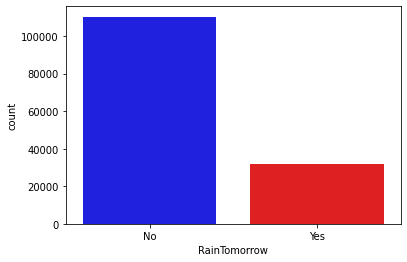

In [9]:
#first of all let us evaluate the target and find out if our data is imbalanced or not
cols= ["#0000FF","#FF0000"]
sns.countplot(x= data["RainTomorrow"], palette= cols)

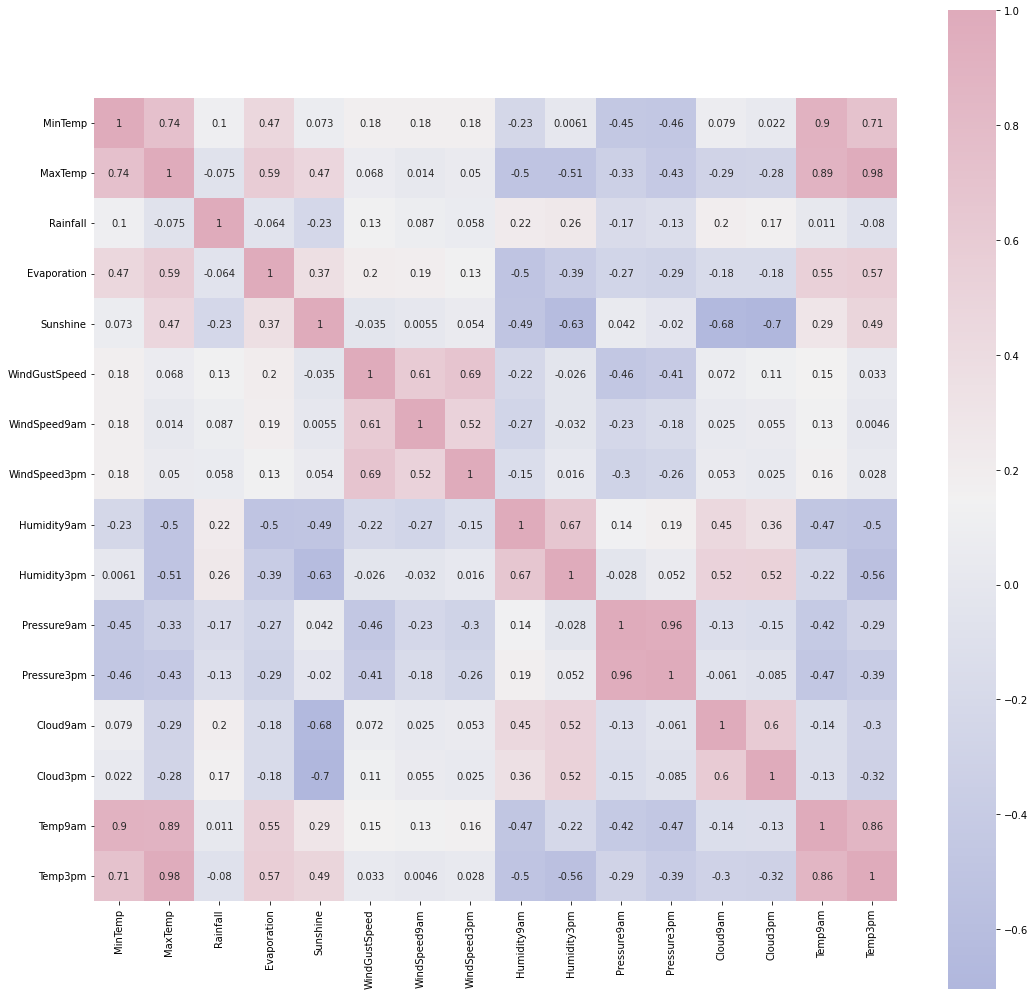

In [10]:
# Correlation amongst numeric attributes
corrmat = data.corr()
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

In [11]:
#data.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)
data['RainToday'].fillna("No", inplace=True)
data['RainTomorrow'].fillna("No", inplace=True)

In [12]:
px.histogram(data, x='Location', title='Location vs. Rainy Days', color='RainToday')

In [13]:
px.histogram(data, x='RainTomorrow', color='RainToday', title='Rain Tomorrow vs. Rain Today')

**Now I will parse Dates into datetime.**

In [14]:
#Parsing datetime
#exploring the length of date objects
lengths = data["Date"].str.len()
lengths.value_counts()

10    145460
Name: Date, dtype: int64

In [15]:
#There don't seem to be any error in dates so parsing values into datetime
data['Date']= pd.to_datetime(data["Date"])
#Creating a collumn of year
data['year'] = data.Date.dt.year

# function to encode datetime into cyclic parameters. 
#As I am planning to use this data in a neural network I prefer the months and days in a cyclic continuous feature. 

def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

data['month'] = data.Date.dt.month
data = encode(data, 'month', 12)

data['day'] = data.Date.dt.day
data = encode(data, 'day', 31)

data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Temp3pm,RainToday,RainTomorrow,year,month,month_sin,month_cos,day,day_sin,day_cos
0,2008-01-12,Arunachal Pradesh,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,21.8,No,No,2008,1,0.500000,8.660254e-01,12,0.651372,-0.758758
1,2008-02-12,Arunachal Pradesh,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,24.3,No,No,2008,2,0.866025,5.000000e-01,12,0.651372,-0.758758
2,2008-03-12,Arunachal Pradesh,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,23.2,No,No,2008,3,1.000000,6.123234e-17,12,0.651372,-0.758758
3,2008-04-12,Arunachal Pradesh,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,26.5,No,No,2008,4,0.866025,-5.000000e-01,12,0.651372,-0.758758
4,2008-05-12,Arunachal Pradesh,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,29.7,No,No,2008,5,0.500000,-8.660254e-01,12,0.651372,-0.758758


Text(0.5, 0, 'Days In Year')

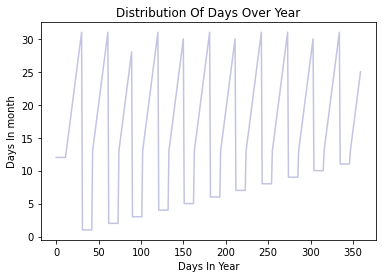

In [16]:
# roughly a year's span section 
section = data[:360] 
tm = section["day"].plot(color="#C2C4E2")
tm.set_title("Distribution Of Days Over Year")
tm.set_ylabel("Days In month")
tm.set_xlabel("Days In Year")

As expected, the "year" attribute of data repeats. However in this for the true cyclic nature is not presented in a continuous manner. Splitting months and days into Sine and cosine combination provides the cyclical continuous feature. This can be used as input features to ANN.

Text(0.5, 0, 'Sine Encoded Months')

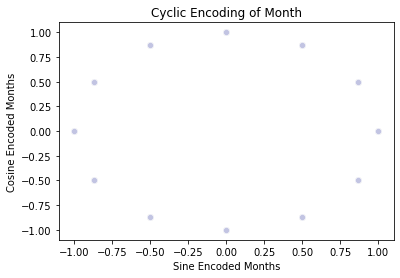

In [17]:
cyclic_month = sns.scatterplot(x="month_sin",y="month_cos",data=data, color="#C2C4E2")
cyclic_month.set_title("Cyclic Encoding of Month")
cyclic_month.set_ylabel("Cosine Encoded Months")
cyclic_month.set_xlabel("Sine Encoded Months")

Text(0.5, 0, 'Sine Encoded Day')

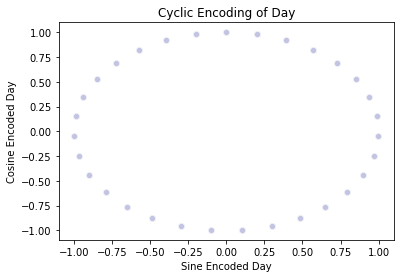

In [18]:
cyclic_day = sns.scatterplot(x='day_sin',y='day_cos',data=data, color="#C2C4E2")
cyclic_day.set_title("Cyclic Encoding of Day")
cyclic_day.set_ylabel("Cosine Encoded Day")
cyclic_day.set_xlabel("Sine Encoded Day")

In [19]:
data.count().sort_values()

Sunshine          75625
Evaporation       82670
Cloud3pm          86102
Cloud9am          89572
Pressure9am      130395
Pressure3pm      130432
WindDir9am       134894
WindGustDir      135134
WindGustSpeed    135197
Humidity3pm      140953
WindDir3pm       141232
Temp3pm          141851
Rainfall         142199
WindSpeed3pm     142398
Humidity9am      142806
Temp9am          143693
WindSpeed9am     143693
MinTemp          143975
MaxTemp          144199
month_sin        145460
day              145460
month_cos        145460
month            145460
Date             145460
RainTomorrow     145460
RainToday        145460
day_sin          145460
Location         145460
year             145460
day_cos          145460
dtype: int64

In [20]:
data = (data.drop(columns=['Evaporation','Sunshine','Cloud3pm','Cloud9am','Date','Location'],axis=1))
data = data.dropna(how='any')
print(data.shape)

(113679, 24)


In [21]:
# Replace No and Yes for 0 and 1 in RainToday and RainTomorrow
data['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
data['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

# Categorical variables WindGustDir, WindDir3pm and WindDir9am in dummy variables for each category.
categoric_c = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
datafinal = pd.get_dummies(data, columns=categoric_c)
print(datafinal.shape)
datafinal.head()

(113679, 69)


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,1,0,0,0,0,0,0,0,0,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0,0,0,0,0,0,0,1,0,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0,0,0,1,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
standa = preprocessing.MinMaxScaler()
standa.fit(datafinal)
datafinal = pd.DataFrame(standa.transform(datafinal), index=datafinal.index, columns=datafinal.columns)
datafinal.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
0,0.513064,0.446154,0.001632,0.289062,0.211765,0.258824,0.71,0.22,0.449587,0.4800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.370546,0.494505,0.000000,0.289062,0.023529,0.235294,0.44,0.25,0.497521,0.4912,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.501188,0.507692,0.000000,0.304688,0.200000,0.282353,0.38,0.30,0.447934,0.5056,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.413302,0.558242,0.000000,0.132812,0.105882,0.082353,0.45,0.16,0.613223,0.5712,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.610451,0.652747,0.002720,0.265625,0.058824,0.211765,0.82,0.33,0.500826,0.4624,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
#We finish debugging the data by eliminating those variables that have a correlation less than 0.5% with the variable of interest.

# Calculate the correlation matrix
corr = datafinal.corr()
corr1 = pd.DataFrame(abs(corr['RainTomorrow']),columns = ['RainTomorrow'])
nonvals = corr1.loc[corr1['RainTomorrow'] < 0.005]
print('Var correlation < 0.5%',nonvals)
nonvals = list(nonvals.index.values)

# We extract variables with correlation less than 0.5%
datafinal1 = datafinal.drop(columns=nonvals,axis=1)
print('Data Final',datafinal1.shape)

Var correlation < 0.5%                  RainTomorrow
month                0.001027
day_sin              0.002532
day_cos              0.001209
WindGustDir_S        0.001800
WindGustDir_SSW      0.002764
WindDir3pm_SSW       0.003125
WindDir3pm_WSW       0.002920
WindDir9am_SW        0.004205
Data Final (113679, 61)


In [24]:
from sklearn.model_selection import train_test_split
Y = datafinal1['RainTomorrow']
X = datafinal1.drop(columns=['RainTomorrow'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=9)

In [25]:
from sklearn.ensemble import ExtraTreesRegressor
etr_model = ExtraTreesRegressor()
etr_model.fit(X,Y)
etr_model.feature_importances_

array([0.02517802, 0.02402244, 0.02108215, 0.05658032, 0.02595292,
       0.02834425, 0.03460373, 0.22768453, 0.03480717, 0.04667029,
       0.02337641, 0.02594657, 0.07395415, 0.02546439, 0.0228886 ,
       0.02281805, 0.02568658, 0.00475189, 0.00432452, 0.00452554,
       0.00678682, 0.00530068, 0.00549179, 0.00590388, 0.00665921,
       0.00570302, 0.00568839, 0.00675062, 0.00733762, 0.00676054,
       0.00702193, 0.0046128 , 0.00463878, 0.00468817, 0.00642925,
       0.00556662, 0.00565959, 0.00614125, 0.0063061 , 0.00677195,
       0.00551734, 0.00558443, 0.00539032, 0.00651492, 0.00688897,
       0.00500998, 0.00524383, 0.00436828, 0.00800176, 0.00578427,
       0.00686358, 0.00661052, 0.0066447 , 0.00601926, 0.00523324,
       0.00554639, 0.00653638, 0.00692701, 0.00627151, 0.00616179])

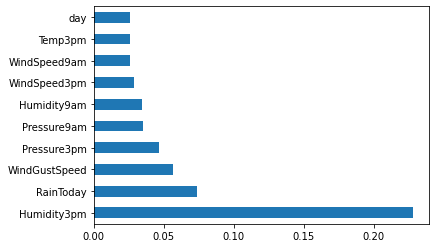

In [26]:
feature_imp = pd.Series(etr_model.feature_importances_,index=X.columns)
feature_imp.nlargest(10).plot(kind='barh')

In [27]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (79575, 60)
Y train shape:  (79575,)
X test shape:  (34104, 60)
Y test shape:  (34104,)


In [28]:
accuracies={}

# **LOGISTIC REGRESSION CLASSIFIER**

In [29]:
#1 Logistic Regression
from sklearn.linear_model import LogisticRegression

# We defining the model
logreg = LogisticRegression(C=10)

# We train the model
logreg.fit(X_train, Y_train)

# We predict target values
Y_predict1 = logreg.predict(X_test)

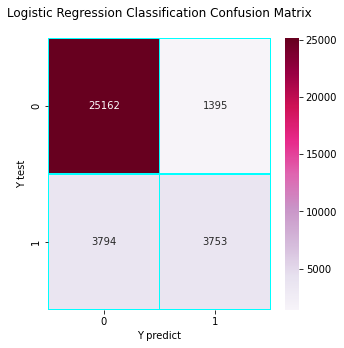


 Accuracy of "Logistic Regression Classification" is:  0.8478477597935726


In [30]:
# The confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

logreg_cm = confusion_matrix(Y_test, Y_predict1)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logreg_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap=plt.cm.PuRd)
plt.title('Logistic Regression Classification Confusion Matrix\n')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()
#print(logreg_cm)
# Accuracy score
acc_logreg=accuracy_score(Y_predict1,Y_test)
accuracies['Logistic Regression'] = acc_logreg*100
print('\n Accuracy of "Logistic Regression Classification" is: ',acc_logreg)

In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# Summary of the predictions made by the classifier
print(classification_report(Y_test, Y_predict1))

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     26557
         1.0       0.73      0.50      0.59      7547

    accuracy                           0.85     34104
   macro avg       0.80      0.72      0.75     34104
weighted avg       0.84      0.85      0.84     34104



In [32]:
# Test score
score_logreg = logreg.score(X_test, Y_test)
print(score_logreg)

0.8478477597935726


# **Support Vector Machine (SVM) Classifier**

In [33]:
#2 SVM

from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

# We define the SVM model
svmcla = SVC(random_state=2)

# We train model
svmcla.fit(X_train, Y_train)

# We predict target values
Y_predict2 = svmcla.predict(X_test)


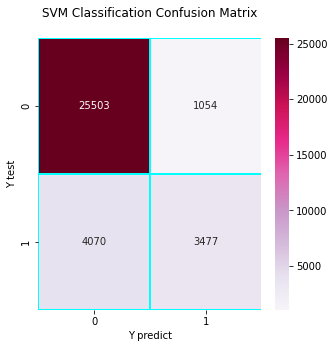


 Accuracy of "SVM Classification" is:  0.8497536945812808


In [34]:
# The confusion matrix
svmcla_cm = confusion_matrix(Y_test, Y_predict2)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(svmcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap=plt.cm.PuRd)
plt.title('SVM Classification Confusion Matrix\n')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()
#print(svmcla_cm )
# Accuracy score
acc_svmcla=accuracy_score(Y_predict2,Y_test)
accuracies['SVM'] = acc_svmcla*100
print('\n Accuracy of "SVM Classification" is: ',acc_svmcla)

In [35]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# Summary of the predictions made by the classifier
print(classification_report(Y_test, Y_predict2))

              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91     26557
         1.0       0.77      0.46      0.58      7547

    accuracy                           0.85     34104
   macro avg       0.81      0.71      0.74     34104
weighted avg       0.84      0.85      0.84     34104



In [36]:
# Test score
score_svmcla = svmcla.score(X_test, Y_test)
print(score_svmcla)#Accuarcy verified

0.8497536945812808


# **NAIVE BAYES CLASSIFIER**

In [37]:
#3 Naive Bayes
from sklearn.naive_bayes import GaussianNB

# We define the model
nbcla = GaussianNB()

# We train model
nbcla.fit(X_train, Y_train)

# We predict target values
Y_predict3 = nbcla.predict(X_test)

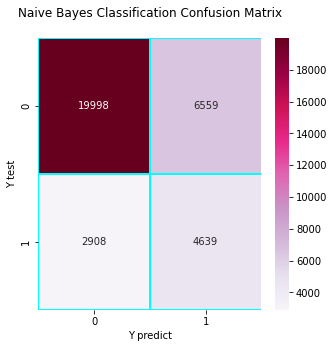


 Accuracy of "Naive Bayes Classification" is:  0.7224079286887168


In [38]:
# The confusion matrix
nbcla_cm = confusion_matrix(Y_test, Y_predict3)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(nbcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap=plt.cm.PuRd)
plt.title('Naive Bayes Classification Confusion Matrix\n')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()
#print(nbcla_cm)
# Accuracy score
acc_nbcla=accuracy_score(Y_predict3,Y_test)
accuracies['Naive Bayes'] = acc_nbcla*100
print('\n Accuracy of "Naive Bayes Classification" is: ',acc_nbcla)

In [39]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# Summary of the predictions made by the classifier
print(classification_report(Y_test, Y_predict3))

              precision    recall  f1-score   support

         0.0       0.87      0.75      0.81     26557
         1.0       0.41      0.61      0.49      7547

    accuracy                           0.72     34104
   macro avg       0.64      0.68      0.65     34104
weighted avg       0.77      0.72      0.74     34104



In [40]:
# Test score
score_nbcla = nbcla.score(X_test, Y_test)
print(score_nbcla)

0.7224079286887168


# **DECISION TREE CLASSIFIER**

In [41]:
#4 Decision Tree
from sklearn.tree import DecisionTreeClassifier

# We define the model
dtcla = DecisionTreeClassifier(random_state=9)

# We train model
dtcla.fit(X_train, Y_train)

# We predict target values
Y_predict4 = dtcla.predict(X_test)

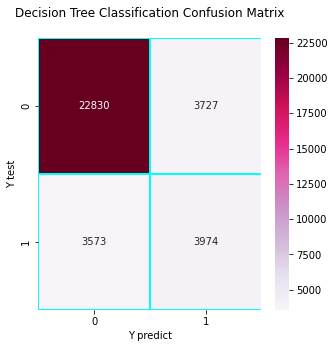


 Accuracy of "Decision Tree Classification" is:  0.7859488623035421


In [42]:
# The confusion matrix
dtcla_cm = confusion_matrix(Y_test, Y_predict4)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(dtcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap=plt.cm.PuRd)
plt.title('Decision Tree Classification Confusion Matrix\n')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()
#print(dtcla_cm)
# Accuracy score
acc_dtcla=accuracy_score(Y_predict4,Y_test)
accuracies['Decision Tree Classification'] = acc_dtcla*100
print('\n Accuracy of "Decision Tree Classification" is: ',acc_dtcla)

In [43]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# Summary of the predictions made by the classifier
print(classification_report(Y_test, Y_predict4))

              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86     26557
         1.0       0.52      0.53      0.52      7547

    accuracy                           0.79     34104
   macro avg       0.69      0.69      0.69     34104
weighted avg       0.79      0.79      0.79     34104



In [44]:
# Test score
score_dtcla = dtcla.score(X_test, Y_test)
print(score_dtcla)

0.7859488623035421


# **RANDOM FOREST CLASSIFIER**

In [45]:
#5 Random Forest
from sklearn.ensemble import RandomForestClassifier

# We define the model
rfcla = RandomForestClassifier(n_estimators=100,random_state=9,n_jobs=-1)

# We train model
rfcla.fit(X_train, Y_train)

# We predict target values
Y_predict5 = rfcla.predict(X_test)

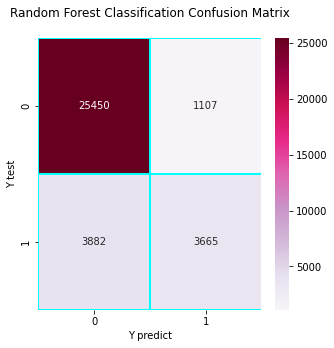


 Accuracy of "Random Forest Classification" is:  0.8537121745249824


In [46]:
# The confusion matrix
rfcla_cm = confusion_matrix(Y_test, Y_predict5)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rfcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap=plt.cm.PuRd)
plt.title('Random Forest Classification Confusion Matrix\n')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()
#print(rfcla_cm)
# Accuracy score
acc_rfcla=accuracy_score(Y_predict5,Y_test)
accuracies['Random Forest Classification'] = acc_rfcla*100
print('\n Accuracy of "Random Forest Classification" is: ',acc_rfcla)

In [47]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# Summary of the predictions made by the classifier
print(classification_report(Y_test, Y_predict5))

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     26557
         1.0       0.77      0.49      0.60      7547

    accuracy                           0.85     34104
   macro avg       0.82      0.72      0.75     34104
weighted avg       0.85      0.85      0.84     34104



In [48]:
# Test score
score_rfcla = rfcla.score(X_test, Y_test)
print(score_rfcla)

0.8537121745249824


# **K-Nearest Neighbors (KNN) Classifier**

In [49]:
#6 KNN
from sklearn.neighbors import KNeighborsClassifier

# We define the model
knncla = KNeighborsClassifier(n_neighbors=15,n_jobs=-1)

# We train model
knncla.fit(X_train, Y_train)

# We predict target values
Y_predict6 = knncla.predict(X_test)

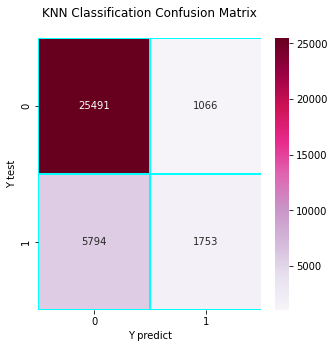


 Accuracy of "KNN Classification" is:  0.7988505747126436


In [50]:
# The confusion matrix
knncla_cm = confusion_matrix(Y_test, Y_predict6)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knncla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap=plt.cm.PuRd)
plt.title('KNN Classification Confusion Matrix\n')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()
#print(knncla_cm)
# Accuracy score
acc_knncla=accuracy_score(Y_predict6,Y_test)
accuracies['K-Nearest Neighbors'] = acc_knncla*100
print('\n Accuracy of "KNN Classification" is: ',acc_knncla)

In [51]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# Summary of the predictions made by the classifier
print(classification_report(Y_test, Y_predict6))

              precision    recall  f1-score   support

         0.0       0.81      0.96      0.88     26557
         1.0       0.62      0.23      0.34      7547

    accuracy                           0.80     34104
   macro avg       0.72      0.60      0.61     34104
weighted avg       0.77      0.80      0.76     34104



In [52]:
# Test score
score_knncla= knncla.score(X_test, Y_test)
print(score_knncla)

0.7988505747126436


# **ARTIFICIAL NEURAL NETWORKS (ANN) CLASSIFIER**

In [53]:
#****************Artificial Neural Network (ANN) *************************

#importing required libraries -- Neural network module
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
from keras.layers import BatchNormalization 
from keras.utils import np_utils
from yellowbrick.model_selection import learning_curve
import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [54]:
#Initialising ANN
ANNclassifier = Sequential()

In [55]:
#Adding Input layer and 1st Hidden Layer
ANNclassifier.add(Dense(units=8,activation="sigmoid"))

In [56]:
#Adding 2nd hidden layer
ANNclassifier.add(Dense(units=8,activation="sigmoid"))

In [57]:
#Adding Output Layer
ANNclassifier.add(Dense(units=1,activation="sigmoid"))

In [58]:
#Compiling ANN
ANNclassifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [59]:
#Fitting ANN
result=ANNclassifier.fit(X_train, Y_train, validation_data=(X_test,Y_test),batch_size = 15, epochs = 30, verbose = 1)

Epoch 1/30
5305/5305 [==============================] - 12s 2ms/step - loss: 0.4396 - accuracy: 0.8069 - val_loss: 0.3761 - val_accuracy: 0.8381
Epoch 2/30
5305/5305 [==============================] - 11s 2ms/step - loss: 0.3665 - accuracy: 0.8433 - val_loss: 0.3628 - val_accuracy: 0.8440
Epoch 3/30
5305/5305 [==============================] - 11s 2ms/step - loss: 0.3614 - accuracy: 0.8457 - val_loss: 0.3608 - val_accuracy: 0.8448
Epoch 4/30
5305/5305 [==============================] - 11s 2ms/step - loss: 0.3589 - accuracy: 0.8462 - val_loss: 0.3595 - val_accuracy: 0.8453
Epoch 5/30
5305/5305 [==============================] - 13s 2ms/step - loss: 0.3567 - accuracy: 0.8475 - val_loss: 0.3573 - val_accuracy: 0.8449
Epoch 6/30
5305/5305 [==============================] - 11s 2ms/step - loss: 0.3547 - accuracy: 0.8484 - val_loss: 0.3549 - val_accuracy: 0.8466
Epoch 7/30
5305/5305 [==============================] - 11s 2ms/step - loss: 0.3531 - accuracy: 0.8489 - val_loss: 0.3565 - val_ac

In [60]:
_, train_acc = ANNclassifier.evaluate(X_train, Y_train, verbose=1)
_, test_acc = ANNclassifier.evaluate(X_test, Y_test, verbose=1)
print("Artificial Neural Network (ANN) classifier has accuracy of: ")
print('Train Accuracy : %.3f, Test Accuracy : %.3f' % (train_acc, test_acc))

1066/1066 [==============================] - 2s 1ms/step - loss: 0.3440 - accuracy: 0.8507
Artificial Neural Network (ANN) classifier has accuracy of: 
Train Accuracy : 0.853, Test Accuracy : 0.851


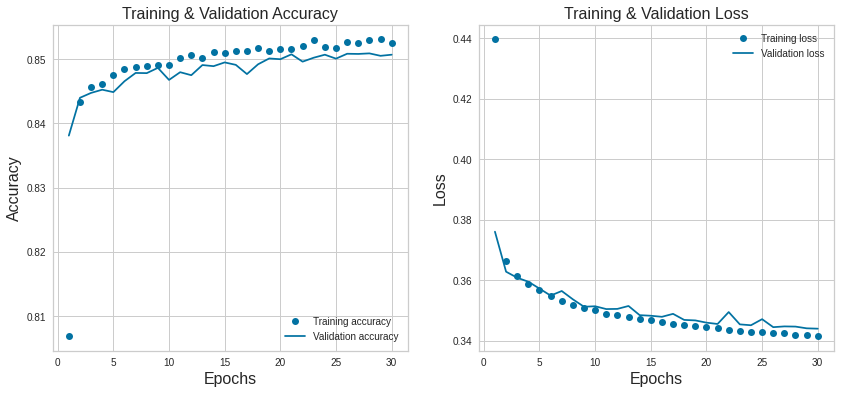

In [61]:
# Import ML Libaries 
import keras #library for neural network
from sklearn.preprocessing import normalize #machine learning algorithm library
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
 
history_dict = result.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

In [62]:
# We predict target values
Y_predict7 = ANNclassifier.predict(X_test)

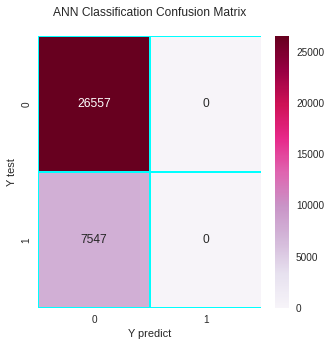


 Accuracy of "ANN Classification" is:  0.8507212996482849


In [63]:
# The confusion matrix
import tensorflow as tf
anncla_cm = tf.math.confusion_matrix(Y_test, Y_predict7)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(anncla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap=plt.cm.PuRd)
plt.title('ANN Classification Confusion Matrix\n')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()
#print(anncla_cm)
# Accuracy score
acc_anncla=accuracy_score(Y_predict7.astype(int),Y_test)
accuracies['ANN'] = test_acc*100
print('\n Accuracy of "ANN Classification" is: ',test_acc)

In [64]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# Summary of the predictions made by the classifier
print(classification_report(Y_test, Y_predict7.astype(int)))

              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88     26557
         1.0       0.00      0.00      0.00      7547

    accuracy                           0.78     34104
   macro avg       0.39      0.50      0.44     34104
weighted avg       0.61      0.78      0.68     34104



# **COMPARING ACCURACIES**

In [65]:
#Comparing Accuracies
Accuracies = pd.Series([acc_logreg, acc_svmcla, acc_nbcla, acc_dtcla, acc_rfcla, acc_knncla, test_acc], 
                        index=['Logistic Regression Accuracy', 'Support Vector Machine Accuracy', 'Naive Bayes Accuracy', 'Decision Tree Accuracy', 'Random Forest Accuracy', 'K-Nearest Neighbour Accuracy', 'Artificial Neural Networks']) 
print(Accuracies)

Logistic Regression Accuracy       0.847848
Support Vector Machine Accuracy    0.849754
Naive Bayes Accuracy               0.722408
Decision Tree Accuracy             0.785949
Random Forest Accuracy             0.853712
K-Nearest Neighbour Accuracy       0.798851
Artificial Neural Networks         0.850721
dtype: float64


In [66]:
#Comparing TestScores
Testscores = pd.Series([score_logreg, score_svmcla, score_nbcla, score_dtcla, score_rfcla, score_knncla, test_acc], 
                        index=['Logistic Regression Score', 'Support Vector Machine Score', 'Naive Bayes Score', 'Decision Tree Score', 'Random Forest Score', 'K-Nearest Neighbour Score', 'ANN Score']) 
print(Testscores)

Logistic Regression Score       0.847848
Support Vector Machine Score    0.849754
Naive Bayes Score               0.722408
Decision Tree Score             0.785949
Random Forest Score             0.853712
K-Nearest Neighbour Score       0.798851
ANN Score                       0.850721
dtype: float64


In [67]:
#RESULTS
accuracy_df  = pd.DataFrame(list(accuracies.items()),columns = ['Model Name', 'Accuracy Score']) 
accuracy_df

,Model Name,Accuracy Score
0,Logistic Regression,84.784776
1,SVM,84.975369
2,Naive Bayes,72.240793
3,Decision Tree Classification,78.594886
4,Random Forest Classification,85.371217
5,K-Nearest Neighbors,79.885057
6,ANN,85.072130


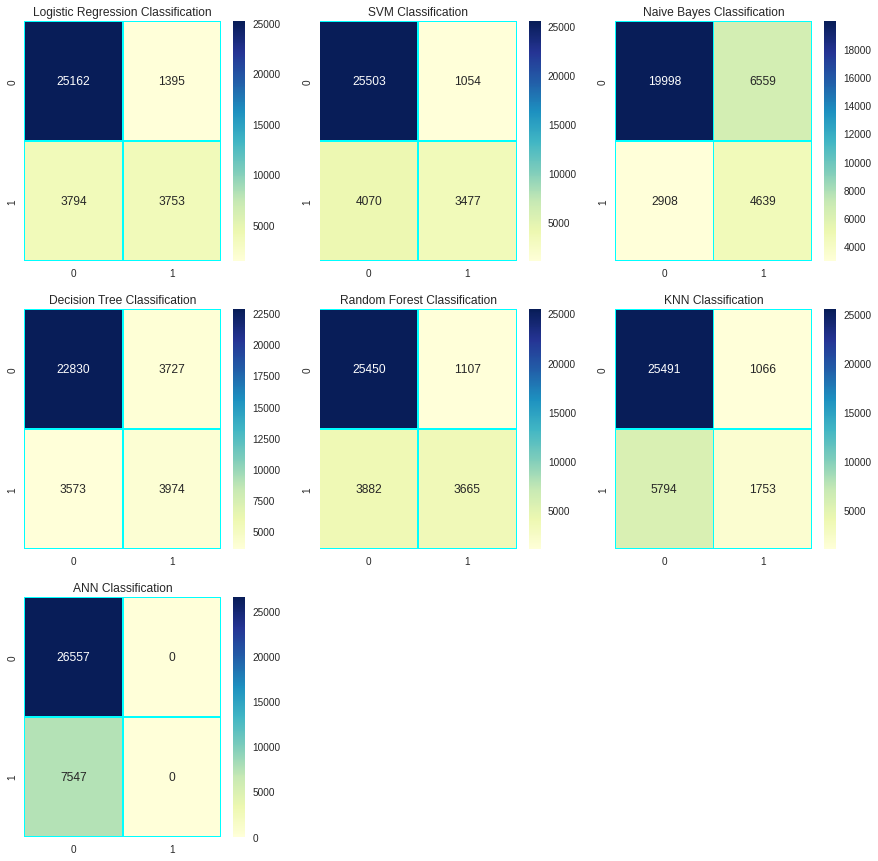

In [68]:
#The Confussion Matrix
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3, 3, 1) 
ax1.set_title('Logistic Regression Classification') 
ax2 = fig.add_subplot(3, 3, 2) 
ax2.set_title('SVM Classification')
ax3 = fig.add_subplot(3, 3, 3)
ax3.set_title('Naive Bayes Classification')
ax4 = fig.add_subplot(3, 3, 4)
ax4.set_title('Decision Tree Classification')
ax5 = fig.add_subplot(3, 3, 5)
ax5.set_title('Random Forest Classification')
ax6 = fig.add_subplot(3, 3, 6)
ax6.set_title('KNN Classification')
ax7 = fig.add_subplot(3, 3, 7)
ax7.set_title('ANN Classification')
sns.heatmap(data=logreg_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax1)
sns.heatmap(data=svmcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax2)  
sns.heatmap(data=nbcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax3)
sns.heatmap(data=dtcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax4)
sns.heatmap(data=rfcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax5)
sns.heatmap(data=knncla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax6)
sns.heatmap(data=anncla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax7)
plt.show()

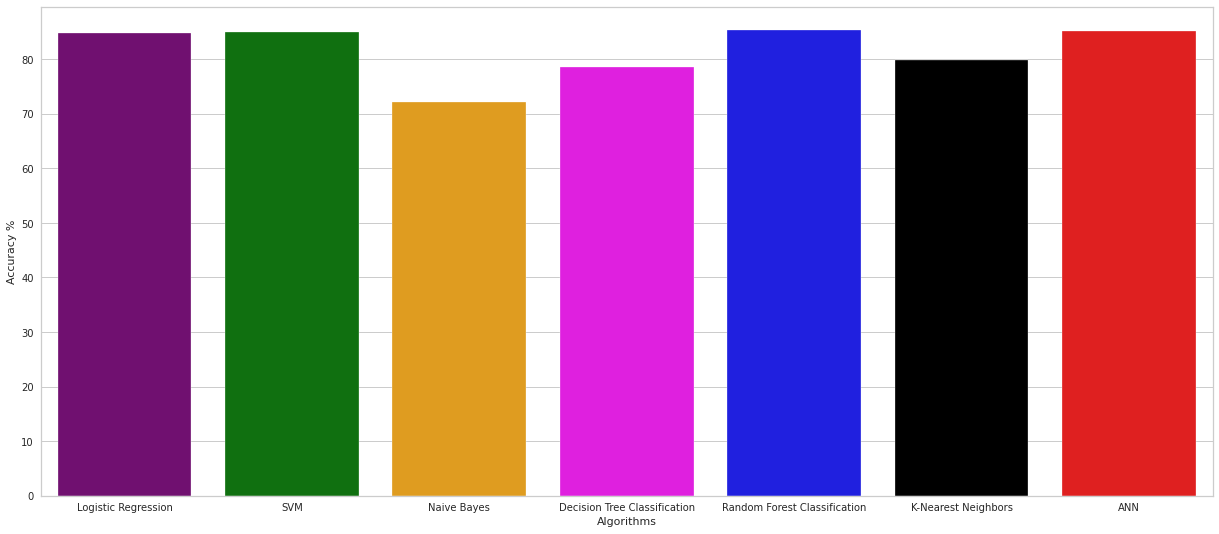

In [69]:
colors = ["purple", "green", "orange", "magenta","blue","black", "red"]

sns.set_style("whitegrid")
plt.figure(figsize=(21,9))
plt.yticks(np.arange(0,1200,10))
plt.ylabel("Accuracy %")#percent so multiply by 100
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors )
plt.show()

***Hence we can see here that,Random Forest has more accuracy compared to other models for this dataset***

# ***Applying KNN Regression***

In [70]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [71]:
#Reading the iris.csv files using pandas
data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/weatherIND.csv')

In [72]:
#Problem: Predict 'sepal_length'
data.drop('RainTomorrow', axis= 1, inplace= True)
data.drop('Location', axis= 1, inplace= True)
data.drop('Date', axis= 1, inplace= True)
data.drop('WindGustDir', axis= 1, inplace= True)
data.drop('WindDir9am', axis= 1, inplace= True)
data.drop('WindDir3pm', axis= 1, inplace= True)
data.drop('RainToday', axis= 1, inplace= True)

data=data.fillna(data.mean())

In [73]:
data.isnull().any()

MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustSpeed    False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
dtype: bool

In [74]:
print(data.tail())

        MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
145455      2.8  23.400000       0.0     5.468232  7.611178       31.00000   
145456      3.6  25.300000       0.0     5.468232  7.611178       22.00000   
145457      5.4  26.900000       0.0     5.468232  7.611178       37.00000   
145458      7.8  27.000000       0.0     5.468232  7.611178       28.00000   
145459     14.9  23.221348       0.0     5.468232  7.611178       40.03523   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   
145459          17.0          17.0         62.0         36.0       1020.2   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
145455  

In [75]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.649940,1015.255889,4.447461,4.509930,16.990631,21.683390
std,6.365750,7.088124,8.382488,3.161541,2.729486,13.118253,8.861059,8.716581,18.854765,20.471189,6.728467,6.663973,2.265604,2.092954,6.449221,6.850057
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.700000,18.000000,0.000000,4.000000,7.611178,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,3.000000,4.000000,12.300000,16.700000
50%,12.100000,22.700000,0.000000,5.468232,7.611178,39.000000,13.000000,18.662657,69.000000,51.539116,1017.649940,1015.255889,4.447461,4.509930,16.800000,21.400000
75%,16.800000,28.200000,1.000000,5.468232,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [76]:
# Variables 
X= data.drop(labels= 'Rainfall', axis= 1)
y= data['Rainfall']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30)
print("Training Data size : ",X_train.shape)
print("Test Data size : ",X_test.shape)

Training Data size :  (101822, 15)
Test Data size :  (43638, 15)


**Preprocessing – Scaling the features**

In [77]:
# Feature Scaling 
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [78]:
# Instantiating KNeighborsRegressor() Model with 'k=9' i.e; 9 neighbours
rmse_val = []
model = neighbors.KNeighborsRegressor(n_neighbors = 9)
model.fit(X_train, y_train)  #fit the model
pred=model.predict(X_test) #make prediction on test set
error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
rmse_val.append(error) #store rmse values
print('RMSE value for k =' , 9 , 'is:', error)

RMSE value for k = 9 is: 7.699875349402882


In [79]:
#predictions
y_pred = model.predict(X_test)
print("Today's Rainfall Rate predictions on test data :\n",y_pred)

Today's Rainfall Rate predictions on test data :
 [1.46666667 5.97777778 0.         ... 1.53333333 0.02222222 0.02222222]


In [80]:
# Calculate the accuracy of the model
print("Accuracy of the model :")
print(model.score(X_test, y_test))

Accuracy of the model :
0.2106876886375052


In [97]:
print(data.iloc[2])

MinTemp            12.900000
MaxTemp            25.700000
Rainfall            0.000000
Evaporation         5.468232
Sunshine            7.611178
WindGustSpeed      46.000000
WindSpeed9am       19.000000
WindSpeed3pm       26.000000
Humidity9am        38.000000
Humidity3pm        30.000000
Pressure9am      1007.600000
Pressure3pm      1008.700000
Cloud9am            4.447461
Cloud3pm            2.000000
Temp9am            21.000000
Temp3pm            23.200000
Name: 2, dtype: float64


In [92]:
#d = {'MinTemp' : [12.9],'MaxTemp' : [25.700000],'Evaporation' : [5.468232],'Sunshine' : [7.611178],
#      'WindGustSpeed' : [46.00000],'WindSpeed9am' : [19.0],'WindSpeed3pm' : [26.0],'Humidity9am' : [38.0],
#      'Humidity3pm' : [30.0],'Pressure9am' : [1007.6],'Pressure3pm' : [1008.7],'Cloud9am' : [4.447461],
#     'Cloud3pm' : [2.00000],'Temp9am' : [21.0],'Temp3pm' : [23.2]}

X_test=np.array([[12.9,25.700000,5.468232,7.611178,46.00000,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2]])
X_test

array([[  12.9     ,   25.7     ,    5.468232,    7.611178,   46.      ,
          19.      ,   26.      ,   38.      ,   30.      , 1007.6     ,
        1008.7     ,    4.447461,    2.      ,   21.      ,   23.2     ]])

In [93]:
model.predict(X_test)

array([0.04444444])

In [94]:
pred = model.predict(X_test)
print('Today Actual Rainfall Rate:', 0)
print('Today Predicted  Rainfall Rate:', pred[0])

Today Actual Rainfall Rate: 0
Today Predicted  Rainfall Rate: 0.044444444444444446
